# **DL_MultiTaskLearning_DonationMaximization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)

### Data Preparation

In [2]:
df = pd.read_csv('G:\我的雲端硬碟\GitHub_Desktop\DL_MultiTaskLearning_DonationMaximization_\Data\Donar_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118854 entries, 0 to 118853
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ACCOUNT_ID           118854 non-null  object 
 1   NUMBER_OF_DONATIONS  118854 non-null  int64  
 2   VALUE_OF_DONATIONS   118854 non-null  float64
 3   CITY                 99728 non-null   object 
 4   STATE                99728 non-null   object 
 5   ZIP                  99728 non-null   object 
 6   MI                   12957 non-null   object 
 7   ALUMNI_TYPE          118854 non-null  object 
 8   UG_CLASS_YEAR        118854 non-null  int64  
 9   UG_SCHOOL            70297 non-null   object 
 10  GRAD_DEGREE          54423 non-null   object 
 11  GRAD_CLASS_YEAR      54422 non-null   float64
 12  GRAD_SCHOOL          54393 non-null   object 
 13  GENDER               118854 non-null  object 
 14  MARRIED_TO_ALUM      118854 non-null  object 
 15  ROTC             

In [4]:
df.describe(include = 'all')

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
count,118854,118854.000000,118854.000000,99728,99728,99728,12957,118854,118854.000000,70297,54423,54422.00000,54393,118854,118854,118854.000000,118854.000000
unique,118854,NaN,NaN,4515,60,87028,20,2,NaN,10,38,NaN,9,2,2,NaN,NaN
top,003o000000pO6zhAAC,NaN,NaN,San Francisco,CA,94118,L,Undergraduate,NaN,College of Arts and Sci (Arts),MA,NaN,School of Education,F,N,NaN,NaN
freq,1,NaN,NaN,13763,77935,38,693,64431,NaN,24244,17376,NaN,16030,67199,115013,NaN,NaN
mean,NaN,0.485714,214.147586,NaN,NaN,NaN,NaN,NaN,1996.331609,NaN,NaN,1999.43736,NaN,NaN,NaN,0.051248,0.089345
std,NaN,1.497361,3033.199077,NaN,NaN,NaN,NaN,NaN,16.569137,NaN,NaN,14.38638,NaN,NaN,NaN,0.220504,0.285242
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1855.000000,NaN,NaN,1915.00000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,1988.00000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1998.000000,NaN,NaN,2001.00000,NaN,NaN,NaN,0.000000,0.000000
75%,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,2012.00000,NaN,NaN,NaN,0.000000,0.000000


In [5]:
df.head()

,ACCOUNT_ID,NUMBER_OF_DONATIONS,VALUE_OF_DONATIONS,CITY,STATE,ZIP,MI,ALUMNI_TYPE,UG_CLASS_YEAR,UG_SCHOOL,GRAD_DEGREE,GRAD_CLASS_YEAR,GRAD_SCHOOL,GENDER,MARRIED_TO_ALUM,ROTC,JC
0,003o000000pO6zhAAC,0,0.0,Gainesville,FL,32605-6400,NaN,Graduate,1969,NaN,MS,1969.0,College of Arts and Sci (Sci),M,N,0,0
1,003o000000pOSIxAAO,1,100.0,Pasadena,CA,91105-1515,NaN,Graduate,1968,NaN,JD,1968.0,School of Law,M,N,0,1
2,003o000000pNvhHAAS,4,1700.0,San Rafael,CA,94901-2478,NaN,Graduate,1964,NaN,JD,1964.0,School of Law,M,N,0,0
3,003o000000q0hl1AAA,0,0.0,San Antonio,TX,78232-4154,T,Undergraduate,1967,School of Nursing,NaN,NaN,NaN,F,N,0,0
4,003o000000pOZe9AAG,5,500.0,Westborough,MA,1581,NaN,Undergraduate,1964,School of Business,NaN,NaN,NaN,M,N,0,1


In [6]:
df.dtypes

ACCOUNT_ID              object
NUMBER_OF_DONATIONS      int64
VALUE_OF_DONATIONS     float64
CITY                    object
STATE                   object
ZIP                     object
MI                      object
ALUMNI_TYPE             object
UG_CLASS_YEAR            int64
UG_SCHOOL               object
GRAD_DEGREE             object
GRAD_CLASS_YEAR        float64
GRAD_SCHOOL             object
GENDER                  object
MARRIED_TO_ALUM         object
ROTC                     int64
JC                       int64
dtype: object

In [7]:
df.isnull().sum()

ACCOUNT_ID                  0
NUMBER_OF_DONATIONS         0
VALUE_OF_DONATIONS          0
CITY                    19126
STATE                   19126
ZIP                     19126
MI                     105897
ALUMNI_TYPE                 0
UG_CLASS_YEAR               0
UG_SCHOOL               48557
GRAD_DEGREE             64431
GRAD_CLASS_YEAR         64432
GRAD_SCHOOL             64461
GENDER                      0
MARRIED_TO_ALUM             0
ROTC                        0
JC                          0
dtype: int64

#### Drop insignificant columns

In [8]:
df = df.drop(['MI'], axis = 1)

#### Unique values in each categorical column

In [9]:
categorical_col = ['ZIP', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['32605-6400' '91105-1515' '94901-2478' ... '94108-3820' '96067-1194'
 '95003-3172']
['Graduate' 'Undergraduate']
[nan 'School of Nursing' 'School of Business'
 'College of Arts and Sci (Arts)' 'College of Arts and Sci (Sci)'
 'School of Education' 'College of Prof. Studies' 'School of Law'
 'Sch of Bus and Prof Studies' 'Continuing Education'
 'Not used in standing']
['MS' 'JD' nan 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
[1969. 1968. 1964.   nan 1927. 1972. 1970. 1973. 1976. 1967. 1961. 1971.
 1974. 1962. 1963. 1965. 1958. 1950. 1980. 1997. 1949. 1979. 1966. 1960.
 1952. 1975. 1998. 1991. 2000. 1987. 1990. 1999. 1943. 2006. 1986. 1930.
 1977. 1981. 1982. 2002. 2005. 1945. 1978. 1985. 1994. 2004. 1992. 1984.
 2003. 1989. 1995. 1996. 1988. 1983. 1993. 2001. 2011. 2015. 2008. 1948.
 2010. 2012. 2020. 2007. 

#### 'ZIP'

In [10]:
df['ZIP_V2'] = df['ZIP'].str.replace('-', '').str[3:]

In [11]:
df['ZIP_V2'] = df['ZIP_V2'].apply(lambda x: '000000' if len(str(x)) < 6 else x)

In [12]:
df['ZIP_V2'] = df['ZIP_V2'].fillna(value = '000000')

#### 'GRAD_SCHOOL'

In [13]:
GRAD_SCHOOL_mapping_dict = {
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'Col of Arts/Sci and Sch Mgt': 'Arts and Sciences',
    'School of Law': 'Law',
    'School of Education': 'Education',
    'School of Nursing': 'Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Prof. Studies': 'Business and Professional Studies',
    np.nan: 'GRAD_SCHOOL_Unknown'
}

df['GRAD_SCHOOL'] = df['GRAD_SCHOOL'].replace(GRAD_SCHOOL_mapping_dict)


#### 'UG_SCHOOL'

In [14]:
UG_SCHOOL_mapping_dict = {
    'School of Nursing': 'School of Nursing',
    'School of Business': 'Business and Professional Studies',
    'Sch of Bus and Prof Studies': 'Business and Professional Studies',
    'College of Arts and Sci (Arts)': 'Arts and Sciences',
    'College of Arts and Sci (Sci)': 'Arts and Sciences',
    'School of Education': 'School of Education',
    'College of Prof. Studies': 'Business and Professional Studies',
    'School of Law': 'School of Law',
    'Continuing Education': 'Continuing Education',
    'Not used in standing': 'Not Categorized',
    np.nan: 'UG_SCHOOL_Unknown'
  }

df['UG_SCHOOL'] = df['UG_SCHOOL'].replace(UG_SCHOOL_mapping_dict)


#### 'GENDER', 'MARRIED_TO_ALUM'

In [15]:
GENDER_mapping_dict = {
    'M': 1,
    'F': 0,
    np.nan: 'GENDER_Unknown'
  }

MARRIED_TO_ALUM_mapping_dict = {
    'N': 0,
    'Y': 1,
    np.nan: 'MARRIED_TO_ALUM_Unknown'
  }

df['GENDER'] = df['GENDER'].replace(GENDER_mapping_dict)
df['MARRIED_TO_ALUM'] = df['MARRIED_TO_ALUM'].replace(MARRIED_TO_ALUM_mapping_dict)

#### 'GRAD_CLASS_YEAR', 'UG_CLASS_YEAR'

In [16]:
def year_mapping(year):
    if np.isnan(year):
        return 'NA'
    else:
        return str(int(year//10 * 10)) + 's'

df['UG_CLASS_YEAR'] = df['UG_CLASS_YEAR'].apply(year_mapping)
df['GRAD_CLASS_YEAR'] = df['GRAD_CLASS_YEAR'].apply(year_mapping)

#### 'GRAD_DEGREE'

In [17]:
df['GRAD_DEGREE'] = df['GRAD_DEGREE'].fillna(value = 'NA')

#### 'DONATED'

In [18]:
df['DONATED'] = df['NUMBER_OF_DONATIONS'].apply(lambda x: 1 if x > 0 else 0)

#### 'AVERAGE_DONATIONS'

In [19]:
df['AVERAGE_DONATIONS'] = df['VALUE_OF_DONATIONS'] / df['NUMBER_OF_DONATIONS']


#### Unique Values

In [20]:
categorical_col = ['STATE', 'CITY', 'ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR', 'GENDER', 'MARRIED_TO_ALUM', 'ROTC', 'JC']
for c in categorical_col:
  print(df[c].unique())

['FL' 'CA' 'TX' 'MA' nan 'TN' 'WA' 'UT' 'NY' 'MN' 'ID' 'VA' 'NC' 'WI' 'CO'
 'LA' 'OR' 'NV' 'NM' 'KY' 'IL' 'HI' 'MO' 'NE' 'AR' 'GA' 'AZ' 'IA' 'RI'
 'ME' 'AK' 'DC' 'AL' 'MD' 'MT' 'CT' 'MI' 'WY' 'OK' 'NH' 'NJ' 'PA' 'VT'
 'DE' 'OH' 'SC' 'WV' 'IN' 'MS' 'SD' 'KS' 'GU' 'AP' 'ND' 'MP' 'VI' 'AE'
 'PR' 'AS' 'FM' 'AA']
['Gainesville' 'Pasadena' 'San Rafael' ... 'Cambria Heights' 'Wilson'
 'Lake View Ter']
['056400' '051515' '012478' ... '156110' '083820' '671194']
['Graduate' 'Undergraduate']
['UG_SCHOOL_Unknown' 'School of Nursing'
 'Business and Professional Studies' 'Arts and Sciences'
 'School of Education' 'School of Law' 'Continuing Education'
 'Not Categorized']
['MS' 'JD' 'NA' 'MA' 'MBA' 'MPA' 'MHR' 'EDD' 'MAT' 'MSE' 'MRA' 'MSP' 'MHL'
 'MSN' 'MPT' 'MNA' 'MMD' 'MAS' 'MAW' 'MFA' 'PSD' 'LLM' 'CRD' 'DNP' 'MGEM'
 'MGEN' 'MPH' 'MOPA' 'PSYD' 'PSM' 'MLSL' 'MIG' 'HON' 'MSA' 'NDG' 'MNB'
 'MCA' 'MSB' 'MPM']
['1960s' 'NA' '1920s' '1970s' '1950s' '1980s' '1990s' '1940s' '2000s'
 '1930s' '2010s' '2020s

#### Missing Value

In [21]:
df.isnull().sum()

ACCOUNT_ID                 0
NUMBER_OF_DONATIONS        0
VALUE_OF_DONATIONS         0
CITY                   19126
STATE                  19126
ZIP                    19126
ALUMNI_TYPE                0
UG_CLASS_YEAR              0
UG_SCHOOL                  0
GRAD_DEGREE                0
GRAD_CLASS_YEAR            0
GRAD_SCHOOL                0
GENDER                     0
MARRIED_TO_ALUM            0
ROTC                       0
JC                         0
ZIP_V2                     0
DONATED                    0
AVERAGE_DONATIONS      98620
dtype: int64

In [22]:
df['STATE'].fillna(0, inplace=True)
df['CITY'].fillna(0, inplace=True)
df['AVERAGE_DONATIONS'].fillna(0, inplace=True)

#### Categorical Variable

In [23]:
from category_encoders import CountEncoder, TargetEncoder

In [24]:
target_encoder = TargetEncoder()

encoded_columns = target_encoder.fit_transform(df[['ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY']], df['DONATED'])
encoded_columns = encoded_columns.rename(columns = {'ZIP_V2': 'ZIP_ENCODED', 'ALUMNI_TYPE': 'ALUMNI_TYPE_ENCODED', 'UG_SCHOOL': 'UG_SCHOOL_ENCODED', 'GRAD_DEGREE': 'GRAD_DEGREE_ENCODED', 'GRAD_CLASS_YEAR': 'GRAD_CLASS_YEAR_ENCODED', 'GRAD_SCHOOL': 'GRAD_SCHOOL_ENCODED', 'UG_CLASS_YEAR': 'UG_CLASS_YEAR_ENCODED','STATE': 'STATE_ENCODED', 'CITY': 'CITY_ENCODED'})

In [25]:
df_encoded = pd.concat([df, pd.DataFrame(encoded_columns)], axis = 1)
df_encoded = df_encoded.drop(['ZIP', 'ZIP_V2', 'ALUMNI_TYPE', 'UG_SCHOOL', 'GRAD_DEGREE', 'GRAD_CLASS_YEAR', 'GRAD_SCHOOL', 'UG_CLASS_YEAR','STATE','CITY'], axis = 1)

#### Split the Data

In [26]:
from sklearn.model_selection import train_test_split

In [84]:
X = df_encoded.drop(['DONATED', 'NUMBER_OF_DONATIONS', 'VALUE_OF_DONATIONS', 'ACCOUNT_ID', 'AVERAGE_DONATIONS'], axis = 1)
Y_regression = df_encoded['VALUE_OF_DONATIONS']
Y_classification= df_encoded['DONATED']

In [87]:
X_train, X_test, Y_regression_train, Y_regression_test, Y_classification_train, Y_classification_test = train_test_split(X, Y_regression, Y_classification, test_size=0.2, random_state=42)

### Data Exploration

### Data Modeling

In [29]:
import os
from datetime import datetime

from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow import keras

import mlflow
import optuna

c:\Users\Reazeng\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [88]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

EXPERIMENT_NAME = "DonationMaximization"
mlflow.set_experiment(EXPERIMENT_NAME)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if experiment is None:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME) 
else:
    experiment_id = experiment.experiment_id

In [ ]:
def objective(trial):

    with mlflow.start_run(nested=True) as run:

        trial_num = trial.number
        mlflow.set_tag("trial_num", trial_num)
        
        # Set up Options for Hyperparameters Tuning
        units = trial.suggest_categorical("units", [16, 32, 64, 128])
        dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5, step=0.1)
        learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)
        activation = trial.suggest_categorical("activation", ["relu", "elu", "tanh"])
        
        # Log Parameters to MLflow
        params = {
            "units": units,
            "dropout_rate": dropout_rate,
            "learning_rate": learning_rate,
            "activation": activation,
            "batch_size": 32,
            "epochs": 50,
            "early_stopping_patience": 5
        }
        mlflow.log_params(params)
        
        # Model Building
        inputs = tf.keras.Input(shape=X_train.shape[1:])
        x = inputs
        x = tf.keras.layers.Dense(units, activation=activation)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        
        reg_output = tf.keras.layers.Dense(1, name='regression_output')(x)
        class_output = tf.keras.layers.Dense(1, activation='sigmoid', name='classification_output')(x)
        
        model = tf.keras.Model(inputs=inputs, outputs=[reg_output, class_output])
        
        # Model Compilation
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss={
                'regression_output': 'mse',
                'classification_output': 'binary_crossentropy'
            },
            metrics={
                'regression_output': 'mae',
                'classification_output': 'accuracy'
            }
        )
        
        # Model Training
        history = model.fit(
            x=X_train,
            y={'regression_output': Y_regression_train, 'classification_output': Y_classification_train},
            validation_split= 0.3,
            epochs=50,
            batch_size=32,
            callbacks=[
                tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            ],
            verbose=0 
        )
    
        
        # Log Metrics to MLflow
        for epoch in range(len(history.history['loss'])):
            metrics_dict = {}
            for metric_name, values in history.history.items():
                if epoch < len(values):
                    metrics_dict[metric_name] = values[epoch]
            mlflow.log_metrics(metrics_dict, step=epoch)
            
        # Set User Attributes for Best Trial in Parent Run
        trial.set_user_attr("run_id", run.info.run_id)
        trial.set_user_attr("model_path", f"model_trial_{trial.number}")    
        for metric_name, value in metrics_dict.items():
            trial.set_user_attr(metric_name, value)
        
        # Log Model to MLflow
        model_name = f"model_trial_{trial_num}"
        mlflow.keras.log_model(keras_model=model, artifact_path=model_name)
        
        # Log Run ID to MLflow
        mlflow.log_param("run_id", run.info.run_id)
        
        return best_val_loss

# Optimize Hyperparameters conducting Optuna
now = datetime.now().strftime("%Y%m%d_%H%M")
with mlflow.start_run(run_name=f"Optuna_Optimization_{now}") as main_run:
    study = optuna.create_study(direction="minimize", study_name="Optuna_Optimization")
    study.optimize(objective, n_trials=5) 
    
    # Generate Best Trial Information
    best_trial_num = study.best_trial.number
    best_val_loss = study.best_value
    
    # Log Parameters
    mlflow.log_params({
        "best_trial": best_trial_num,
        "best_val_loss": best_val_loss,
        "total_trials": len(study.trials)
    })
    
    mlflow.log_params({f"best_{k}": v for k, v in study.best_params.items()})
    
    # Log Metrics
    best_metrics = {}
    for key, value in study.best_trial.user_attrs.items():
        if isinstance(value, (int, float)):
            best_metrics[key] = value
    mlflow.log_metrics(best_metrics)

    
    # Generate Best Trial Information for Loading Best Model
    best_trial = study.best_trial
    best_run_id = best_trial.user_attrs["run_id"]
    best_model_path = best_trial.user_attrs["model_path"]
    
    # Load Best Model
    best_model_uri = f"runs:/{best_run_id}/{best_model_path}"
    best_model = mlflow.keras.load_model(best_model_uri)
    mlflow.keras.log_model(
        keras_model=best_model, 
        artifact_path="best_model",
        registered_model_name="DonationMaximization_MTL_Model"
    )

[I 2025-07-03 00:10:25,082] A new study created in memory with name: Optuna_Optimization


---

### Feature importance: Shape

In [46]:
import shap

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6488/6488 [==============================] - 8s 1ms/step


  1%|          | 1/100 [00:13<21:29, 13.03s/it]

6488/6488 [==============================] - 19s 3ms/step


  2%|▏         | 2/100 [00:36<31:00, 18.98s/it]

6488/6488 [==============================] - 24s 4ms/step


  3%|▎         | 3/100 [01:03<36:34, 22.63s/it]

6488/6488 [==============================] - 18s 3ms/step


  4%|▍         | 4/100 [01:24<35:20, 22.09s/it]

6488/6488 [==============================] - 18s 3ms/step


  5%|▌         | 5/100 [01:45<34:26, 21.75s/it]

6488/6488 [==============================] - 18s 3ms/step


  6%|▌         | 6/100 [02:06<33:25, 21.33s/it]

6488/6488 [==============================] - 18s 3ms/step


  7%|▋         | 7/100 [02:27<32:59, 21.28s/it]

6488/6488 [==============================] - 18s 3ms/step


  8%|▊         | 8/100 [02:48<32:38, 21.28s/it]

6488/6488 [==============================] - 19s 3ms/step


  9%|▉         | 9/100 [03:10<32:25, 21.38s/it]

6488/6488 [==============================] - 18s 3ms/step


 10%|█         | 10/100 [03:31<31:56, 21.29s/it]

6488/6488 [==============================] - 17s 3ms/step


 11%|█         | 11/100 [03:52<31:40, 21.35s/it]

6488/6488 [==============================] - 18s 3ms/step


 12%|█▏        | 12/100 [04:13<31:03, 21.18s/it]

6488/6488 [==============================] - 19s 3ms/step


 13%|█▎        | 13/100 [04:35<31:07, 21.47s/it]

6488/6488 [==============================] - 18s 3ms/step


 14%|█▍        | 14/100 [04:57<31:09, 21.73s/it]

6488/6488 [==============================] - 18s 3ms/step


 15%|█▌        | 15/100 [05:18<30:26, 21.49s/it]

6488/6488 [==============================] - 18s 3ms/step


 16%|█▌        | 16/100 [05:39<29:52, 21.34s/it]

6488/6488 [==============================] - 18s 3ms/step


 17%|█▋        | 17/100 [06:00<29:19, 21.20s/it]

6488/6488 [==============================] - 18s 3ms/step


 18%|█▊        | 18/100 [06:22<29:00, 21.23s/it]

6488/6488 [==============================] - 18s 3ms/step


 19%|█▉        | 19/100 [06:43<28:50, 21.36s/it]

6488/6488 [==============================] - 18s 3ms/step


 20%|██        | 20/100 [07:04<28:20, 21.26s/it]

6488/6488 [==============================] - 18s 3ms/step


 21%|██        | 21/100 [07:26<28:08, 21.38s/it]

6488/6488 [==============================] - 18s 3ms/step


 22%|██▏       | 22/100 [07:47<27:43, 21.33s/it]

6488/6488 [==============================] - 19s 3ms/step


 23%|██▎       | 23/100 [08:09<27:43, 21.60s/it]

6488/6488 [==============================] - 18s 3ms/step


 24%|██▍       | 24/100 [08:31<27:19, 21.58s/it]

6488/6488 [==============================] - 20s 3ms/step


 25%|██▌       | 25/100 [08:55<27:47, 22.23s/it]

6488/6488 [==============================] - 19s 3ms/step


 26%|██▌       | 26/100 [09:16<27:06, 21.98s/it]

6488/6488 [==============================] - 19s 3ms/step


 27%|██▋       | 27/100 [09:37<26:32, 21.82s/it]

6488/6488 [==============================] - 19s 3ms/step


 28%|██▊       | 28/100 [09:59<26:00, 21.68s/it]

6488/6488 [==============================] - 19s 3ms/step


 29%|██▉       | 29/100 [10:20<25:34, 21.61s/it]

6488/6488 [==============================] - 19s 3ms/step


 30%|███       | 30/100 [10:43<25:28, 21.83s/it]

6488/6488 [==============================] - 17s 3ms/step


 31%|███       | 31/100 [11:03<24:30, 21.31s/it]

6488/6488 [==============================] - 19s 3ms/step


 32%|███▏      | 32/100 [11:25<24:23, 21.53s/it]

6488/6488 [==============================] - 19s 3ms/step


 33%|███▎      | 33/100 [11:46<24:02, 21.53s/it]

6488/6488 [==============================] - 18s 3ms/step


 34%|███▍      | 34/100 [12:08<23:35, 21.45s/it]

6488/6488 [==============================] - 18s 3ms/step


 35%|███▌      | 35/100 [12:29<23:04, 21.31s/it]

6488/6488 [==============================] - 18s 3ms/step


 36%|███▌      | 36/100 [12:50<22:44, 21.32s/it]

6488/6488 [==============================] - 17s 3ms/step


 37%|███▋      | 37/100 [13:11<22:11, 21.14s/it]

6488/6488 [==============================] - 19s 3ms/step


 38%|███▊      | 38/100 [13:32<21:58, 21.26s/it]

6488/6488 [==============================] - 18s 3ms/step


 39%|███▉      | 39/100 [13:53<21:35, 21.24s/it]

6488/6488 [==============================] - 18s 3ms/step


 40%|████      | 40/100 [14:14<21:09, 21.16s/it]

6488/6488 [==============================] - 18s 3ms/step


 41%|████      | 41/100 [14:36<20:53, 21.25s/it]

6488/6488 [==============================] - 18s 3ms/step


 42%|████▏     | 42/100 [14:57<20:24, 21.11s/it]

6488/6488 [==============================] - 19s 3ms/step


 43%|████▎     | 43/100 [15:18<20:13, 21.29s/it]

6488/6488 [==============================] - 18s 3ms/step


 44%|████▍     | 44/100 [15:40<19:52, 21.30s/it]

6488/6488 [==============================] - 19s 3ms/step


 45%|████▌     | 45/100 [16:01<19:31, 21.30s/it]

6488/6488 [==============================] - 18s 3ms/step


 46%|████▌     | 46/100 [16:22<19:06, 21.24s/it]

6488/6488 [==============================] - 19s 3ms/step


 47%|████▋     | 47/100 [16:43<18:49, 21.31s/it]

6488/6488 [==============================] - 19s 3ms/step


 48%|████▊     | 48/100 [17:05<18:33, 21.41s/it]

6488/6488 [==============================] - 18s 3ms/step


 49%|████▉     | 49/100 [17:26<18:11, 21.39s/it]

6488/6488 [==============================] - 19s 3ms/step


 50%|█████     | 50/100 [17:49<18:00, 21.61s/it]

6488/6488 [==============================] - 18s 3ms/step


 51%|█████     | 51/100 [18:10<17:36, 21.57s/it]

6488/6488 [==============================] - 19s 3ms/step


 52%|█████▏    | 52/100 [18:31<17:13, 21.53s/it]

6488/6488 [==============================] - 19s 3ms/step


 53%|█████▎    | 53/100 [18:53<16:53, 21.57s/it]

6488/6488 [==============================] - 18s 3ms/step


 54%|█████▍    | 54/100 [19:14<16:27, 21.48s/it]

6488/6488 [==============================] - 19s 3ms/step


 55%|█████▌    | 55/100 [19:36<16:04, 21.44s/it]

6488/6488 [==============================] - 19s 3ms/step


 56%|█████▌    | 56/100 [19:57<15:47, 21.53s/it]

6488/6488 [==============================] - 19s 3ms/step


 57%|█████▋    | 57/100 [20:19<15:24, 21.50s/it]

6488/6488 [==============================] - 18s 3ms/step


 58%|█████▊    | 58/100 [20:40<15:00, 21.45s/it]

6488/6488 [==============================] - 18s 3ms/step


 59%|█████▉    | 59/100 [21:01<14:36, 21.38s/it]

6488/6488 [==============================] - 19s 3ms/step


 60%|██████    | 60/100 [21:23<14:13, 21.35s/it]

6488/6488 [==============================] - 19s 3ms/step


 61%|██████    | 61/100 [21:44<13:53, 21.37s/it]

6488/6488 [==============================] - 19s 3ms/step


 62%|██████▏   | 62/100 [22:06<13:37, 21.50s/it]

6488/6488 [==============================] - 18s 3ms/step


 63%|██████▎   | 63/100 [22:27<13:11, 21.38s/it]

6488/6488 [==============================] - 18s 3ms/step


 64%|██████▍   | 64/100 [22:48<12:48, 21.34s/it]

6488/6488 [==============================] - 18s 3ms/step


 65%|██████▌   | 65/100 [23:09<12:22, 21.20s/it]

6488/6488 [==============================] - 18s 3ms/step


 66%|██████▌   | 66/100 [23:31<12:08, 21.41s/it]

6488/6488 [==============================] - 20s 3ms/step


 67%|██████▋   | 67/100 [23:53<11:54, 21.64s/it]

6488/6488 [==============================] - 19s 3ms/step


 68%|██████▊   | 68/100 [24:14<11:27, 21.50s/it]

6488/6488 [==============================] - 19s 3ms/step


 69%|██████▉   | 69/100 [24:37<11:13, 21.72s/it]

6488/6488 [==============================] - 19s 3ms/step


 70%|███████   | 70/100 [24:58<10:47, 21.59s/it]

6488/6488 [==============================] - 18s 3ms/step


 71%|███████   | 71/100 [25:20<10:25, 21.57s/it]

6488/6488 [==============================] - 18s 3ms/step


 72%|███████▏  | 72/100 [25:41<09:59, 21.41s/it]

6488/6488 [==============================] - 19s 3ms/step


 73%|███████▎  | 73/100 [26:03<09:44, 21.65s/it]

6488/6488 [==============================] - 18s 3ms/step


 74%|███████▍  | 74/100 [26:24<09:20, 21.56s/it]

6488/6488 [==============================] - 19s 3ms/step


 75%|███████▌  | 75/100 [26:46<09:04, 21.76s/it]

6488/6488 [==============================] - 18s 3ms/step


 76%|███████▌  | 76/100 [27:07<08:36, 21.50s/it]

6488/6488 [==============================] - 18s 3ms/step


 77%|███████▋  | 77/100 [27:28<08:12, 21.40s/it]

6488/6488 [==============================] - 18s 3ms/step


 78%|███████▊  | 78/100 [27:49<07:47, 21.25s/it]

6488/6488 [==============================] - 18s 3ms/step


 79%|███████▉  | 79/100 [28:11<07:28, 21.35s/it]

6488/6488 [==============================] - 18s 3ms/step


 80%|████████  | 80/100 [28:32<07:05, 21.30s/it]

6488/6488 [==============================] - 19s 3ms/step


 81%|████████  | 81/100 [28:54<06:46, 21.42s/it]

6488/6488 [==============================] - 19s 3ms/step


 82%|████████▏ | 82/100 [29:15<06:24, 21.38s/it]

6488/6488 [==============================] - 19s 3ms/step


 83%|████████▎ | 83/100 [29:37<06:05, 21.50s/it]

6488/6488 [==============================] - 18s 3ms/step


 84%|████████▍ | 84/100 [29:58<05:43, 21.45s/it]

6488/6488 [==============================] - 27s 4ms/step


 85%|████████▌ | 85/100 [30:29<06:02, 24.14s/it]

6488/6488 [==============================] - 23s 3ms/step


 86%|████████▌ | 86/100 [30:58<05:58, 25.63s/it]

6488/6488 [==============================] - 20s 3ms/step


 87%|████████▋ | 87/100 [31:20<05:21, 24.75s/it]

6488/6488 [==============================] - 20s 3ms/step


 88%|████████▊ | 88/100 [31:44<04:51, 24.27s/it]

6488/6488 [==============================] - 19s 3ms/step


 89%|████████▉ | 89/100 [32:06<04:22, 23.88s/it]

6488/6488 [==============================] - 19s 3ms/step


 90%|█████████ | 90/100 [32:29<03:54, 23.45s/it]

6488/6488 [==============================] - 18s 3ms/step


 91%|█████████ | 91/100 [32:50<03:25, 22.85s/it]

6488/6488 [==============================] - 16s 2ms/step


 92%|█████████▏| 92/100 [33:09<02:52, 21.51s/it]

6488/6488 [==============================] - 17s 3ms/step


 93%|█████████▎| 93/100 [33:29<02:26, 20.98s/it]

6488/6488 [==============================] - 21s 3ms/step


 94%|█████████▍| 94/100 [33:53<02:12, 22.14s/it]

6488/6488 [==============================] - 17s 3ms/step


 95%|█████████▌| 95/100 [34:14<01:47, 21.57s/it]

6488/6488 [==============================] - 29s 4ms/step


 96%|█████████▌| 96/100 [34:48<01:41, 25.28s/it]

6488/6488 [==============================] - 34s 5ms/step


 97%|█████████▋| 97/100 [35:25<01:27, 29.08s/it]

6488/6488 [==============================] - 25s 4ms/step


 98%|█████████▊| 98/100 [35:54<00:57, 28.89s/it]

6488/6488 [==============================] - 18s 3ms/step


 99%|█████████▉| 99/100 [36:16<00:26, 26.78s/it]

6488/6488 [==============================] - 17s 3ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

6488/6488 [==============================] - 18s 3ms/step


  1%|          | 1/100 [00:21<35:46, 21.68s/it]

6488/6488 [==============================] - 20s 3ms/step


  2%|▏         | 2/100 [00:44<36:39, 22.44s/it]

6488/6488 [==============================] - 18s 3ms/step


  3%|▎         | 3/100 [01:06<36:03, 22.31s/it]

6488/6488 [==============================] - 19s 3ms/step


  4%|▍         | 4/100 [01:28<35:32, 22.22s/it]

6488/6488 [==============================] - 19s 3ms/step


  5%|▌         | 5/100 [01:50<35:05, 22.16s/it]

6488/6488 [==============================] - 19s 3ms/step


  6%|▌         | 6/100 [02:12<34:13, 21.85s/it]

6488/6488 [==============================] - 17s 3ms/step


  7%|▋         | 7/100 [02:32<33:11, 21.41s/it]

6488/6488 [==============================] - 17s 3ms/step


  8%|▊         | 8/100 [02:52<32:10, 20.98s/it]

6488/6488 [==============================] - 18s 3ms/step


  9%|▉         | 9/100 [03:13<31:45, 20.94s/it]

6488/6488 [==============================] - 17s 3ms/step


 10%|█         | 10/100 [03:33<31:06, 20.74s/it]

6488/6488 [==============================] - 19s 3ms/step


 11%|█         | 11/100 [03:56<31:26, 21.19s/it]

6488/6488 [==============================] - 18s 3ms/step


 12%|█▏        | 12/100 [04:16<30:56, 21.10s/it]

6488/6488 [==============================] - 17s 3ms/step


 13%|█▎        | 13/100 [04:37<30:23, 20.96s/it]

6488/6488 [==============================] - 18s 3ms/step


 14%|█▍        | 14/100 [04:58<29:56, 20.89s/it]

6488/6488 [==============================] - 18s 3ms/step


 15%|█▌        | 15/100 [05:19<29:47, 21.03s/it]

6488/6488 [==============================] - 17s 3ms/step


 16%|█▌        | 16/100 [05:39<28:56, 20.68s/it]

6488/6488 [==============================] - 17s 3ms/step


 17%|█▋        | 17/100 [05:59<28:09, 20.36s/it]

6488/6488 [==============================] - 17s 3ms/step


 18%|█▊        | 18/100 [06:19<27:56, 20.44s/it]

6488/6488 [==============================] - 17s 3ms/step


 19%|█▉        | 19/100 [06:39<27:25, 20.32s/it]

6488/6488 [==============================] - 20s 3ms/step


 20%|██        | 20/100 [07:04<28:43, 21.54s/it]

6488/6488 [==============================] - 18s 3ms/step


 21%|██        | 21/100 [07:25<28:20, 21.52s/it]

6488/6488 [==============================] - 19s 3ms/step


 22%|██▏       | 22/100 [07:48<28:17, 21.77s/it]

6488/6488 [==============================] - 29s 4ms/step


 23%|██▎       | 23/100 [08:25<33:49, 26.36s/it]

6488/6488 [==============================] - 39s 6ms/step


 24%|██▍       | 24/100 [09:08<39:50, 31.45s/it]

6488/6488 [==============================] - 34s 5ms/step


 25%|██▌       | 25/100 [09:45<41:27, 33.17s/it]

6488/6488 [==============================] - 18s 3ms/step


 26%|██▌       | 26/100 [10:06<36:15, 29.40s/it]

6488/6488 [==============================] - 16s 2ms/step


 27%|██▋       | 27/100 [10:25<32:02, 26.33s/it]

6488/6488 [==============================] - 16s 2ms/step


 28%|██▊       | 28/100 [10:44<28:48, 24.01s/it]

6488/6488 [==============================] - 17s 3ms/step


 29%|██▉       | 29/100 [11:03<26:58, 22.80s/it]

6488/6488 [==============================] - 18s 3ms/step


 30%|███       | 30/100 [11:25<26:10, 22.43s/it]

6488/6488 [==============================] - 16s 3ms/step


 31%|███       | 31/100 [11:45<24:50, 21.60s/it]

6488/6488 [==============================] - 17s 3ms/step


 32%|███▏      | 32/100 [12:05<23:57, 21.15s/it]

6488/6488 [==============================] - 17s 3ms/step


 33%|███▎      | 33/100 [12:25<23:13, 20.79s/it]

6488/6488 [==============================] - 16s 2ms/step


 34%|███▍      | 34/100 [12:44<22:28, 20.43s/it]

6488/6488 [==============================] - 16s 3ms/step


 35%|███▌      | 35/100 [13:04<21:45, 20.08s/it]

6488/6488 [==============================] - 17s 3ms/step


 36%|███▌      | 36/100 [13:24<21:23, 20.05s/it]

6488/6488 [==============================] - 18s 3ms/step


 37%|███▋      | 37/100 [13:44<21:07, 20.12s/it]

6488/6488 [==============================] - 16s 3ms/step


 38%|███▊      | 38/100 [14:03<20:32, 19.89s/it]

6488/6488 [==============================] - 17s 3ms/step


 39%|███▉      | 39/100 [14:24<20:22, 20.05s/it]

6488/6488 [==============================] - 17s 3ms/step


 40%|████      | 40/100 [14:44<20:08, 20.14s/it]

6488/6488 [==============================] - 17s 3ms/step


 41%|████      | 41/100 [15:04<19:41, 20.03s/it]

6488/6488 [==============================] - 17s 3ms/step


 42%|████▏     | 42/100 [15:25<19:36, 20.29s/it]

6488/6488 [==============================] - 17s 3ms/step


 43%|████▎     | 43/100 [15:45<19:11, 20.21s/it]

6488/6488 [==============================] - 17s 3ms/step


 44%|████▍     | 44/100 [16:06<19:07, 20.48s/it]

6488/6488 [==============================] - 24s 4ms/step


 45%|████▌     | 45/100 [16:39<22:16, 24.30s/it]

6488/6488 [==============================] - 20s 3ms/step


 46%|████▌     | 46/100 [17:08<23:12, 25.78s/it]

6488/6488 [==============================] - 13s 2ms/step


 47%|████▋     | 47/100 [17:27<20:56, 23.72s/it]

6488/6488 [==============================] - 11s 2ms/step


 48%|████▊     | 48/100 [17:45<18:56, 21.85s/it]

6488/6488 [==============================] - 11s 2ms/step


 49%|████▉     | 49/100 [18:02<17:29, 20.57s/it]

6488/6488 [==============================] - 11s 2ms/step


 50%|█████     | 50/100 [18:20<16:22, 19.65s/it]

6488/6488 [==============================] - 12s 2ms/step


 51%|█████     | 51/100 [18:37<15:30, 18.99s/it]

6488/6488 [==============================] - 11s 2ms/step


 52%|█████▏    | 52/100 [18:55<14:47, 18.49s/it]

6488/6488 [==============================] - 11s 2ms/step


 53%|█████▎    | 53/100 [19:12<14:15, 18.20s/it]

6488/6488 [==============================] - 12s 2ms/step


 54%|█████▍    | 54/100 [19:30<13:48, 18.01s/it]

6488/6488 [==============================] - 11s 2ms/step


 55%|█████▌    | 55/100 [19:47<13:22, 17.82s/it]

6488/6488 [==============================] - 12s 2ms/step


 56%|█████▌    | 56/100 [20:05<13:00, 17.74s/it]

6488/6488 [==============================] - 11s 2ms/step


 57%|█████▋    | 57/100 [20:22<12:39, 17.67s/it]

6488/6488 [==============================] - 12s 2ms/step


 58%|█████▊    | 58/100 [20:40<12:24, 17.73s/it]

6488/6488 [==============================] - 11s 2ms/step


 59%|█████▉    | 59/100 [20:57<12:03, 17.64s/it]

6488/6488 [==============================] - 11s 2ms/step


 60%|██████    | 60/100 [21:15<11:44, 17.61s/it]

6488/6488 [==============================] - 11s 2ms/step


 61%|██████    | 61/100 [21:32<11:23, 17.53s/it]

6488/6488 [==============================] - 11s 2ms/step


 62%|██████▏   | 62/100 [21:50<11:04, 17.48s/it]

6488/6488 [==============================] - 11s 2ms/step


 63%|██████▎   | 63/100 [22:07<10:46, 17.46s/it]

6488/6488 [==============================] - 11s 2ms/step


 64%|██████▍   | 64/100 [22:24<10:27, 17.43s/it]

6488/6488 [==============================] - 11s 2ms/step


 65%|██████▌   | 65/100 [22:42<10:11, 17.47s/it]

6488/6488 [==============================] - 11s 2ms/step


 66%|██████▌   | 66/100 [22:59<09:53, 17.47s/it]

6488/6488 [==============================] - 11s 2ms/step


 67%|██████▋   | 67/100 [23:17<09:38, 17.54s/it]

6488/6488 [==============================] - 12s 2ms/step


 68%|██████▊   | 68/100 [23:35<09:21, 17.56s/it]

6488/6488 [==============================] - 11s 2ms/step


 69%|██████▉   | 69/100 [23:52<09:02, 17.50s/it]

6488/6488 [==============================] - 11s 2ms/step


 70%|███████   | 70/100 [24:10<08:45, 17.50s/it]

6488/6488 [==============================] - 11s 2ms/step


 71%|███████   | 71/100 [24:27<08:25, 17.43s/it]

6488/6488 [==============================] - 12s 2ms/step


 72%|███████▏  | 72/100 [24:45<08:12, 17.58s/it]

6488/6488 [==============================] - 11s 2ms/step


 73%|███████▎  | 73/100 [25:02<07:52, 17.51s/it]

6488/6488 [==============================] - 13s 2ms/step


 74%|███████▍  | 74/100 [25:22<07:54, 18.25s/it]

6488/6488 [==============================] - 18s 3ms/step


 75%|███████▌  | 75/100 [25:44<08:01, 19.25s/it]

6488/6488 [==============================] - 24s 4ms/step


 76%|███████▌  | 76/100 [26:12<08:45, 21.91s/it]

6488/6488 [==============================] - 33s 5ms/step


 77%|███████▋  | 77/100 [26:49<10:12, 26.64s/it]

6488/6488 [==============================] - 19s 3ms/step


 78%|███████▊  | 78/100 [27:12<09:21, 25.54s/it]

6488/6488 [==============================] - 21s 3ms/step


 79%|███████▉  | 79/100 [27:37<08:49, 25.21s/it]

6488/6488 [==============================] - 21s 3ms/step


 80%|████████  | 80/100 [28:02<08:21, 25.09s/it]

6488/6488 [==============================] - 18s 3ms/step


 81%|████████  | 81/100 [28:23<07:36, 24.02s/it]

6488/6488 [==============================] - 19s 3ms/step


 82%|████████▏ | 82/100 [28:45<07:02, 23.46s/it]

6488/6488 [==============================] - 18s 3ms/step


 83%|████████▎ | 83/100 [29:07<06:31, 23.03s/it]

6488/6488 [==============================] - 18s 3ms/step


 84%|████████▍ | 84/100 [29:29<06:03, 22.74s/it]

6488/6488 [==============================] - 18s 3ms/step


 85%|████████▌ | 85/100 [29:51<05:36, 22.45s/it]

6488/6488 [==============================] - 18s 3ms/step


 86%|████████▌ | 86/100 [30:13<05:11, 22.23s/it]

6488/6488 [==============================] - 24s 4ms/step


 87%|████████▋ | 87/100 [30:41<05:09, 23.83s/it]

6488/6488 [==============================] - 20s 3ms/step


 88%|████████▊ | 88/100 [31:05<04:47, 23.93s/it]

6488/6488 [==============================] - 21s 3ms/step


 89%|████████▉ | 89/100 [31:28<04:22, 23.87s/it]

6488/6488 [==============================] - 20s 3ms/step


 90%|█████████ | 90/100 [31:52<03:57, 23.80s/it]

6488/6488 [==============================] - 20s 3ms/step


 91%|█████████ | 91/100 [32:15<03:32, 23.60s/it]

6488/6488 [==============================] - 18s 3ms/step


 92%|█████████▏| 92/100 [32:37<03:04, 23.09s/it]

6488/6488 [==============================] - 19s 3ms/step


 93%|█████████▎| 93/100 [33:01<02:42, 23.19s/it]

6488/6488 [==============================] - 20s 3ms/step


 94%|█████████▍| 94/100 [33:24<02:19, 23.21s/it]

6488/6488 [==============================] - 18s 3ms/step


 95%|█████████▌| 95/100 [33:44<01:52, 22.46s/it]

6488/6488 [==============================] - 18s 3ms/step


 96%|█████████▌| 96/100 [34:06<01:28, 22.04s/it]

6488/6488 [==============================] - 17s 3ms/step


 97%|█████████▋| 97/100 [34:25<01:04, 21.34s/it]

6488/6488 [==============================] - 19s 3ms/step


 98%|█████████▊| 98/100 [34:47<00:42, 21.42s/it]

6488/6488 [==============================] - 18s 3ms/step


 99%|█████████▉| 99/100 [35:08<00:21, 21.37s/it]

6488/6488 [==============================] - 19s 3ms/step


100%|██████████| 100/100 [35:29<00:00, 21.30s/it]


<Figure size 640x480 with 0 Axes>

<Figure size 1150x660 with 0 Axes>

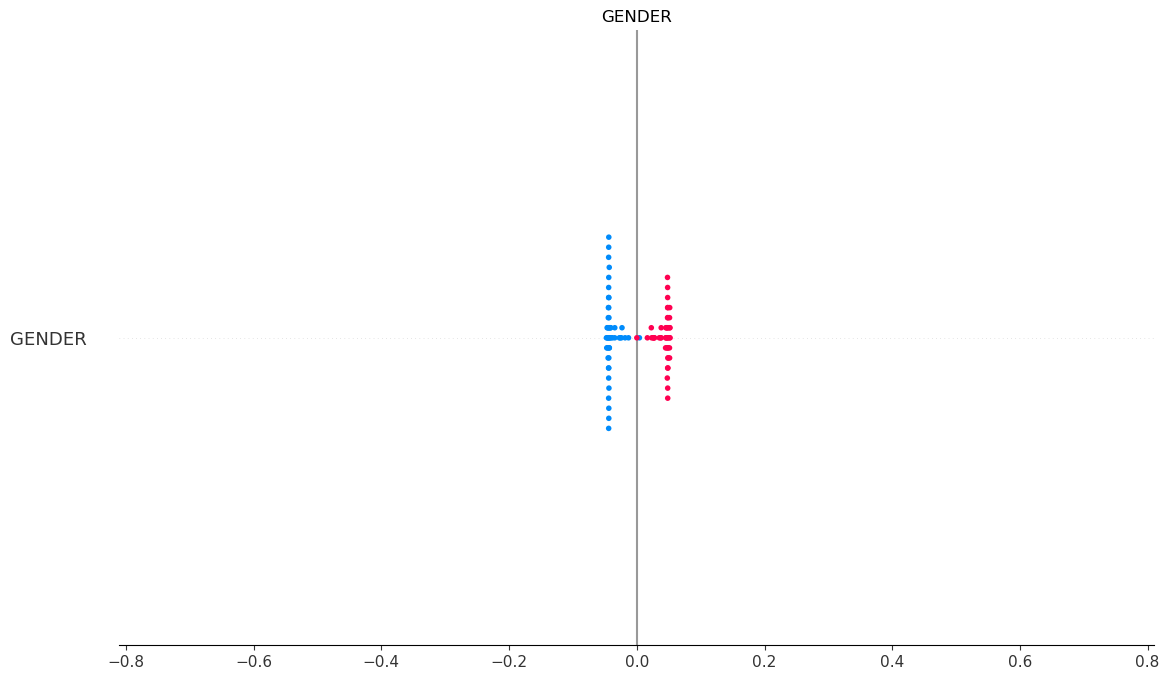

In [ ]:
def predict_class(x):
    prediction = best_model.predict(x)
    return prediction[0]

def predict_reg(x):
    prediction = best_model.predict(x)
    return prediction[1]

sample_data=shap.sample(X_train, 1000)

explainer_class = shap.KernelExplainer(best_model, sample_data)
explainer_reg = shap.KernelExplainer(predict_reg, sample_data)

explain_data= shap.sample(X_test, 1000)

shap_values_class = explainer_class.shap_values(explain_data)
shap_values_reg = explainer_reg.shap_values(explain_data)

In [ ]:
shap_values_class_s = shap_values_class.squeeze()
shap.summary_plot(shap_values_class_s, explain_data, plot_type="bar", max_display=10, show=False)

In [ ]:
shap_values_reg_s = shap_values_class.squeeze()
shap.summary_plot(shap_values_reg_s, explain_data, plot_type="bar", max_display=10, show=False)

---

#### Confusion Matrix

In [200]:
def create_confusion_matrix(label_true, label_pred):
    mat = confusion_matrix(label_true, label_pred)
    plt.figure(figsize = (6, 6))
    sns.heatmap(mat, cmap = 'Blues', alpha = 0.8, annot = True, fmt = 'd')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

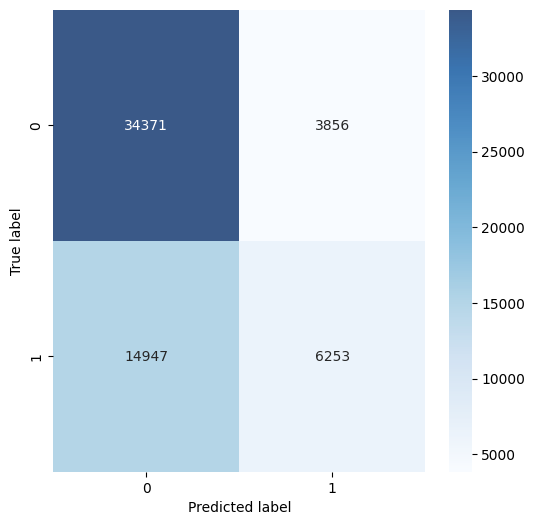

In [214]:
create_confusion_matrix(y_pred_lgbmc, y_test)

In [23]:
sorted_df_proba_lgbmc = df_proba_lgbmc.sort_values(by = '1', ascending = False).iloc[0: 10000]

In [ ]:
plt.figure(figsize = (8, 6))
plt.grid(color = 'lightgray', axis = 'y')
sns.distplot(sorted_df_proba_lgbmc.iloc[0: 10000]['1'])
plt.xlabel('Probability')
plt.ylabel('Value')
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

#### Export excel file including 10000 selected alumni data according to probability

In [24]:
df_2 = pd.merge(df, sorted_df_proba_lgbmc, on = 'ACCOUNT_ID', how = 'inner')

In [ ]:
df_2.to_excel('Selected 10000 Alumni Attributes.xlsx', index = False)
files.download('Selected 10000 Alumni Attributes.xlsx')

#### Feature trends of 10,000 selected alumni

In [75]:
def pie_plot(c):
  plt.figure(figsize = (6, 6))
  plt.grid(color = 'lightgray', axis = 'y')
  plt.pie(c.value_counts(), labels = c.value_counts().index, colors = ['skyblue', 'steelblue'])
  plt.legend(fontsize = 10)
  plt.tight_layout()
  plt.show()

In [ ]:
for c in ['GENDER', 'MARRIED_TO_ALUM', 'JC', 'ROTC', 'ALUMNI_TYPE']:
  print(c)
  pie_plot(sorted_df_3[c])

In [116]:
def count_plot(c):
  order = sorted_df_3[c].value_counts().sort_values(ascending = False).nlargest(10).index
  plt.figure(figsize = (8, 6))
  plt.grid(color = 'lightgray', axis = 'y')
  sns.countplot(data = sorted_df_3, x = c, palette = list(reversed(sns.color_palette('Blues'))), alpha = 0.8, order = order)
  plt.legend(fontsize = 10)
  plt.xticks(rotation = 'vertical')
  plt.tight_layout()
  plt.show()

In [ ]:
for c in ['ZIP','UG_CLASS_YEAR','UG_SCHOOL','GRAD_DEGREE','GRAD_CLASS_YEAR','GRAD_SCHOOL']:
  count_plot(c)

### Result

In [107]:
sorted_df_3.to_excel('Selected 10000 Alumni Attributes.xlsx', index = False)
files.download('Selected 10000 Alumni Attributes.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>